In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv("C:/Users/sumit/Downloads/final_house_prices.csv")
dataset.head(3)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basemen,yr_built,yr_renovated,price
0,4,1.3,4937,10779,1.8,1,2,5,1564,1353,1915,1943,1187857
1,5,1.5,743,9851,1.9,0,3,3,1315,1348,1987,1961,209647
2,3,1.7,4607,1159,1.1,0,2,4,2720,1137,2013,1990,977855


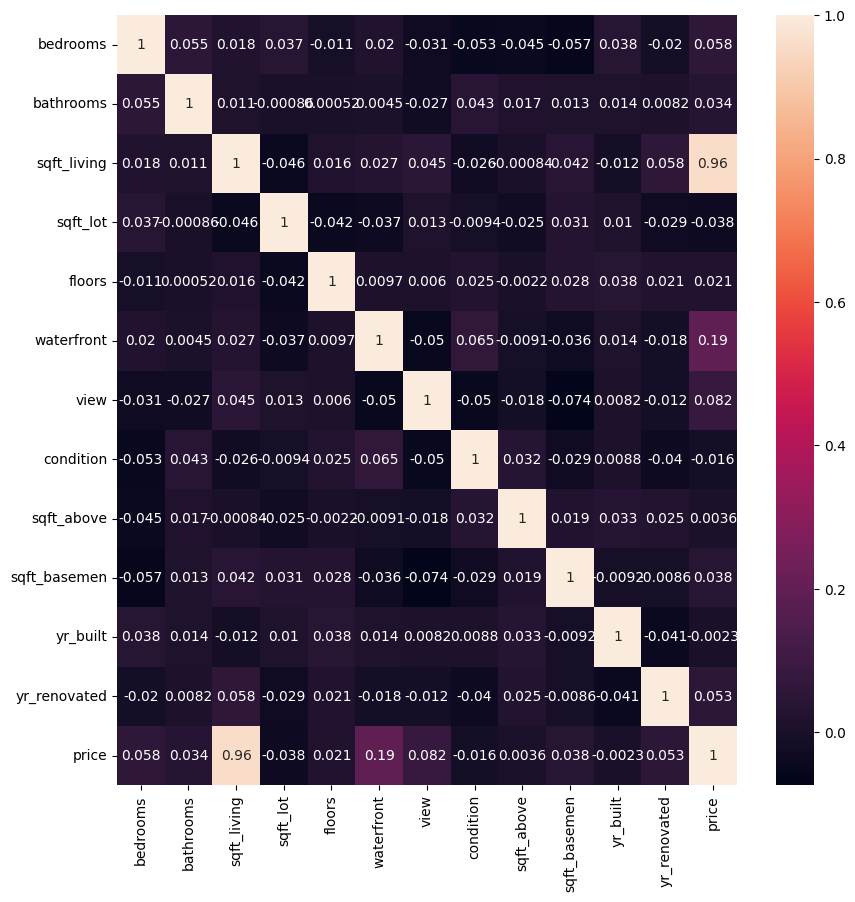

In [5]:
plt.figure(figsize=(10,10))
sns.heatmap(data = dataset.corr(),annot=True)
plt.show()

In [6]:
x = dataset.iloc[:,:-1]
y=dataset["price"]

In [9]:
sc = StandardScaler()
sc.fit(x)
x=pd.DataFrame(sc.transform(x),columns=x.columns)
x

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basemen,yr_built,yr_renovated
0,0.316892,-1.378145,1.732052,0.634692,-0.357397,1.158413,0.152097,1.438986,-0.665667,1.385784,-1.305414,0.471424
1,0.900486,-1.148798,-1.576429,0.405718,-0.183651,-0.863250,0.828086,0.012128,-0.908551,1.374745,0.714786,0.493805
2,-0.266702,-0.919451,1.471728,-1.738938,-1.573626,-0.863250,0.152097,0.725557,0.461936,0.908908,1.444303,0.529864
3,0.900486,-1.148798,-1.326360,1.218477,-1.052385,1.158413,-1.199879,-1.414729,-1.476254,-1.278981,0.434203,0.511213
4,0.900486,-1.034125,1.495394,-0.160795,-0.704891,-0.863250,1.504074,1.438986,-0.930986,1.023711,-1.670173,0.496292
...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.484080,-0.231411,1.275302,1.173077,1.032578,-0.863250,0.152097,0.012128,1.590514,-0.183933,0.069444,0.559707
996,0.900486,0.341956,-0.739448,0.035856,1.380072,-0.863250,0.152097,-0.701301,0.181011,0.911116,0.041386,0.569654
997,-1.433890,-0.002064,0.112522,1.556756,0.163843,-0.863250,0.152097,-1.414729,0.344884,1.138515,1.668770,-1.944545
998,-1.433890,1.488690,-1.624550,-0.071969,1.032578,1.158413,0.828086,0.012128,1.210095,-1.369499,1.444303,0.527378


In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
from sklearn.linear_model import LinearRegression,Lasso , Ridge

In [26]:
from sklearn.metrics import mean_absolute_error , mean_squared_error
import numpy as np

# LinearRegression

In [12]:
lr=LinearRegression()
lr.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
lr.score(x_test,y_test)*100

95.06525503777188

In [29]:
print(mean_squared_error(y_test,lr.predict(x_test)))
print(mean_absolute_error(y_test,lr.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,lr.predict(x_test))))

3453449284.1550035
45496.93768367089
58766.05554361296


In [14]:
lr.coef_

array([ 9.19255138e+03,  6.92349124e+03,  2.51444159e+05,  2.98728103e+03,
        4.78903941e+01,  4.47691714e+04,  1.31928744e+04, -2.96768421e+02,
        7.09039386e+02,  2.08712480e+03,  7.26919921e+02,  8.29415813e+02])

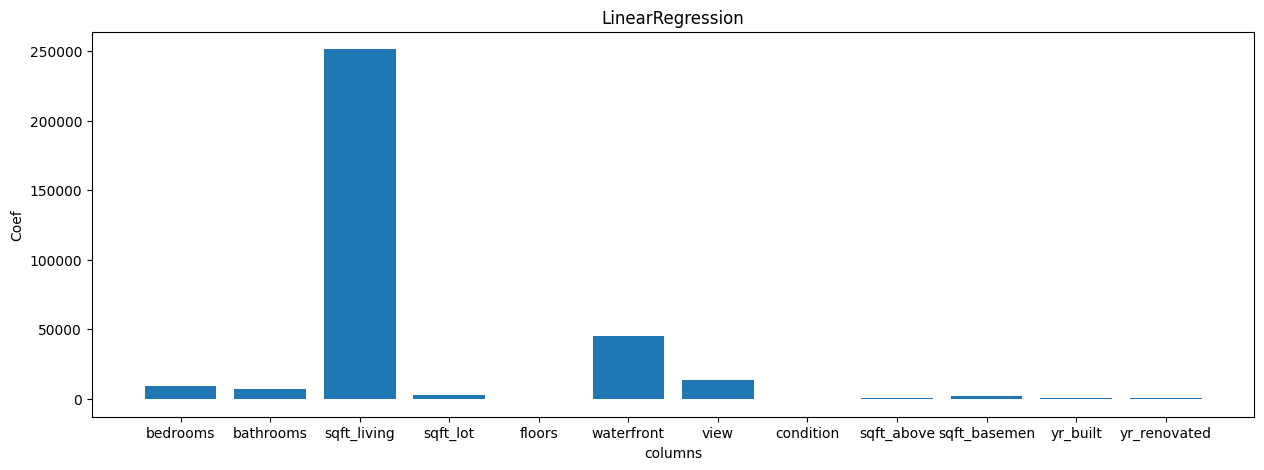

In [17]:
plt.figure(figsize=(15,5))
plt.bar(x.columns,lr.coef_)
plt.title("LinearRegression")
plt.ylabel("Coef")
plt.xlabel("columns")
plt.show()

# Lasso

In [18]:
la = Lasso(alpha=0.5)
la.fit(x_train,y_train)

,alpha,0.5
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [20]:
la.score(x_test,y_test)*100

95.06523329395564

In [30]:
print(mean_squared_error(y_test,la.predict(x_test)))
print(mean_absolute_error(y_test,la.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,la.predict(x_test))))

3453464500.98327
45496.956018131525
58766.18501300957


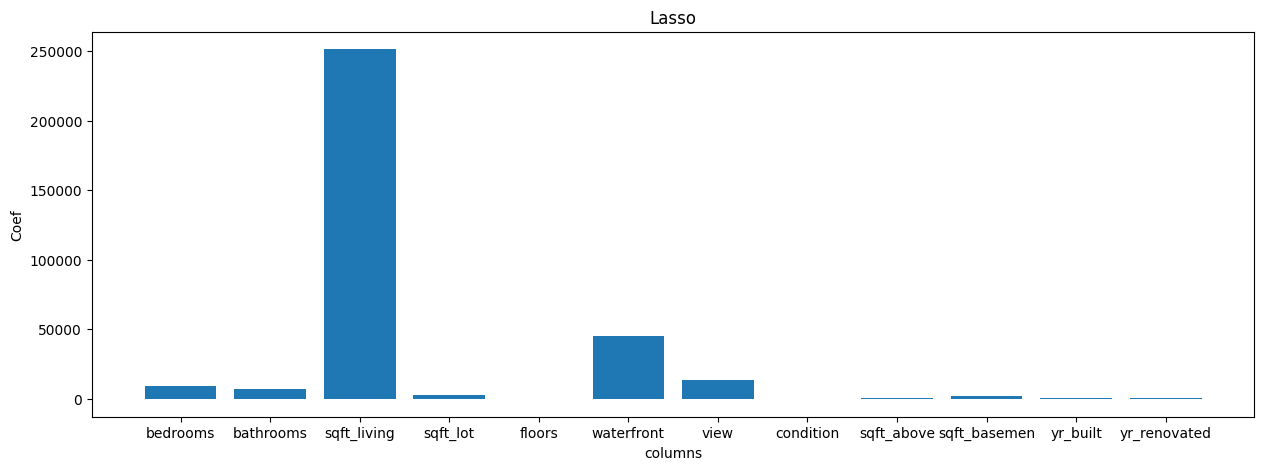

In [21]:
plt.figure(figsize=(15,5))
plt.bar(x.columns,la.coef_)
plt.title("Lasso")
plt.ylabel("Coef")
plt.xlabel("columns")
plt.show()

# Ridge

In [22]:
ri = Ridge(alpha=10)         #alpha reduce the coefficient value and save the model from overfitting,it is called hyperparameter
ri.fit(x_train,y_train)

,alpha,10
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [23]:
ri.score(x_test,y_test)*100

95.02818037103198

In [31]:
print(mean_squared_error(y_test,ri.predict(x_test)))
print(mean_absolute_error(y_test,ri.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,ri.predict(x_test))))

3479394998.1266913
45667.46816442676
58986.39672099569


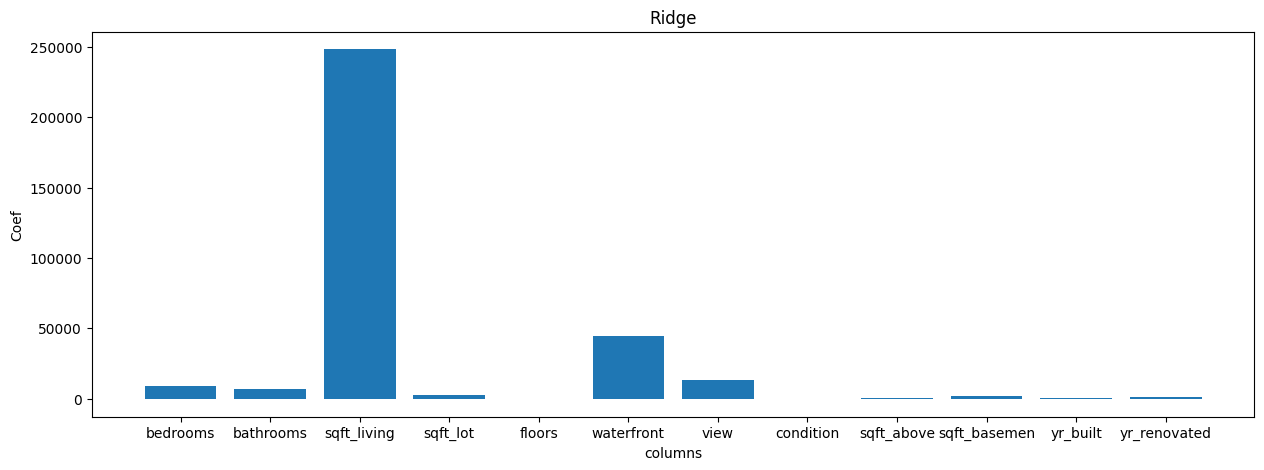

In [24]:
plt.figure(figsize=(15,5))
plt.bar(x.columns,ri.coef_)
plt.title("Ridge")
plt.ylabel("Coef")
plt.xlabel("columns")
plt.show()

In [33]:
df = pd.DataFrame({"col_name":x.columns,"LinearRegression":lr.coef_,"Lasso":la.coef_,"Ridge":ri.coef_})
df

,col_name,LinearRegression,Lasso,Ridge
0,bedrooms,9192.551381,9192.073669,9152.628315
1,bathrooms,6923.491241,6923.021601,6858.948325
2,sqft_living,251444.159383,251443.725087,248380.770378
3,sqft_lot,2987.281030,2986.755958,2820.944520
4,floors,47.890394,47.405379,58.890883
5,waterfront,44769.171433,44768.582318,44222.232146
6,view,13192.874407,13192.223464,13059.722219
7,condition,-296.768421,-296.251446,-351.158301
8,sqft_above,709.039386,708.482242,673.630833
9,sqft_basemen,2087.124799,2086.579343,2167.974746
